### 1. Generate data

*1-1. Initialize the parameters which are used to generate data*


In [0]:
m = 201
a = 0.3
b = 2.1
std = 0.7

*1-2. Generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$*

In [0]:
import numpy as np

x_data = np.linspace(-5, 15, m)
y_hat = a * x_data + b

noise = std * np.random.randn(m)
y_data = y_hat + noise

### 2. Define functions for linear regression


*2-1. Linear function*
  
  $h_\theta(x) = \theta_0 + \theta_1 x$

In [0]:
def linear_func(theta_0, theta_1, x):
  return theta_0 + theta_1 * x

*2-2. Objective function*
  
$J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

In [0]:
def objective_func(h_x, y):
  return (1 / (2 * m)) * np.sum((h_x - y)**2)

*2-3. Gradient function*
  
${\partial\over\partial \theta_0}J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$  
  
${\partial\over\partial \theta_1}J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$

In [0]:
def gradient_func(x, h_x, y):
  d_theta_0 = (1 / m) * np.sum(h_x - y)
  d_theta_1 = (1 / m) * np.sum((h_x - y) * x)

  return d_theta_0, d_theta_1

### 3. Learning with the gradient descent algorithm


*3-1. Initialize model parameters and learning rate*
  
*Model parameters:* $\theta_0^{(0)}$ and $\theta_1^{(0)}$  
*Learning rate:* $\alpha$

In [0]:
theta_0 = 0
theta_1 = 0

lr = 0.001
epoch_count = 20000

*3-2. Run the gradient descent algorithm until convergence*

In [0]:
energy_history = []
theta_0_history = []
theta_1_history = []

for epoch in range(epoch_count):
  h_x = linear_func(theta_0, theta_1, x_data)
  energy = objective_func(h_x, y_data)

  # logging history
  energy_history.append(energy)
  theta_0_history.append(theta_0)
  theta_1_history.append(theta_1)

  # gradient descent
  d_theta = gradient_func(x_data, h_x, y_data)
  theta_0 -= lr * d_theta[0]
  theta_1 -= lr * d_theta[1]

### 4. Plot the results


In [0]:
import matplotlib.pyplot as plt

epoch_axis = np.arange(epoch_count) + 1

*4-1. Input data*

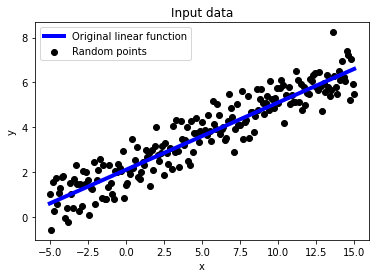

In [267]:
plt.title('Input data')
plt.plot(x_data, y_hat, 'b-', linewidth=4)
plt.scatter(x_data, y_data, c='black')
plt.legend(['Original linear function', 'Random points'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*4-2. Output results*

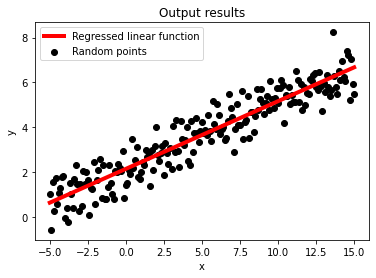

In [268]:
plt.title('Output results')
plt.plot(x_data, linear_func(theta_0, theta_1, x_data), 'r-', linewidth=4)
plt.scatter(x_data, y_data, c='black')
plt.legend(['Regressed linear function', 'Random points'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*4-3. Plotting the energy values*

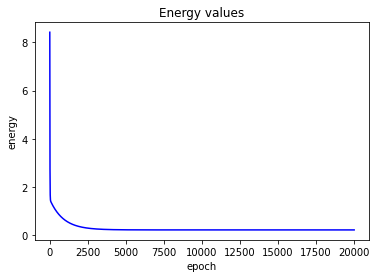

In [269]:
plt.title('Energy values')
plt.plot(epoch_axis, energy_history, 'b-')
plt.xlabel('epoch')
plt.ylabel('energy')
plt.show()

*4-4. Plotting the model parameters*

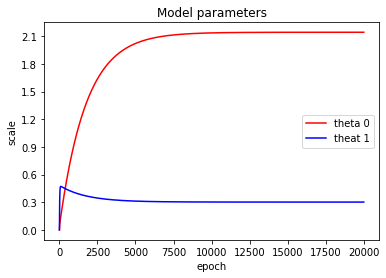

In [270]:
plt.title('Model parameters')
plt.plot(epoch_axis, theta_0_history, 'r-')
plt.plot(epoch_axis, theta_1_history, 'b-')
plt.yticks(np.arange(min(theta_0_history + theta_1_history), max(theta_0_history + theta_1_history) + 0.1, 0.3))
plt.legend(['theta 0', 'theat 1'])
plt.xlabel('epoch')
plt.ylabel('scale')
plt.show()